In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
#read in the 911 data
df = pd.read_csv("../data/911_Calls_for_Service_2021_Through_Present.csv")

In [3]:
# read in the Arrests data
df2 = pd.read_csv("../data/BPD_Arrests.csv")

In [5]:
#df2

In [10]:
# How many arrests per gender
df2["Gender"].value_counts()

M    300313
F     67511
Z         1
Y         1
Name: Gender, dtype: int64

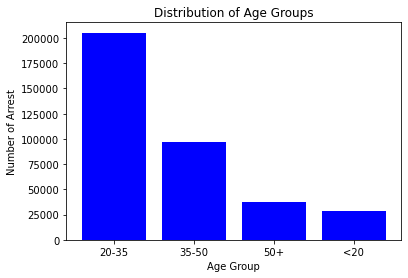

In [16]:
# make a new age group column that labels a row to a age group depending on age
df2["Age Group"] = pd.cut(df2["Age"], bins=[0, 19, 35, 50, float('inf')], labels=["<20", "20-35", "35-50", "50+"])

# Count the occurrences of each age group and graph it
age_group_counts = df2["Age Group"].value_counts()

plt.bar(age_group_counts.index, age_group_counts.values, color='blue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrest')
plt.show()

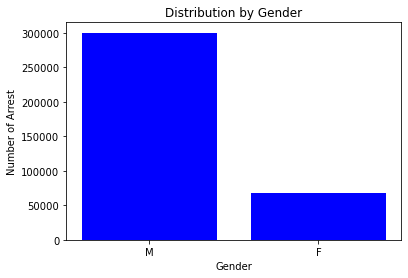

In [17]:
#df2["Gender"] = pd.cut(df2["Age"], bins=["f","M"], labels=["<20", "20-35"])

# Count the occurrences of each gender in the data and graph it
age_group_counts = df2["Gender"].value_counts()[:2]

plt.bar(age_group_counts.index, age_group_counts.values, color='blue')
plt.title('Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Arrest')
plt.show()

In [4]:
#df

In [5]:
# how many 911 calls per district
df["PoliceDistrict"].value_counts()

Southeastern    419019
Southern        414858
Northwestern    366767
Northern        348255
Northeastern    337816
Eastern         321817
Central         319811
Western         298199
Southwestern    284214
Name: PoliceDistrict, dtype: int64

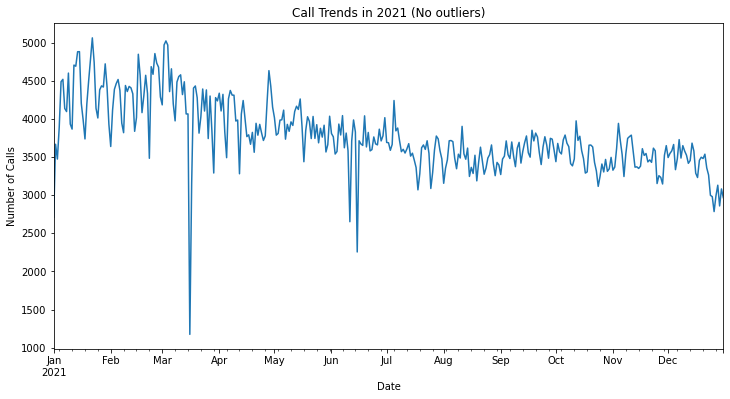

In [6]:
# Analysis of change in total number of 911 calls throughout the year

df['callDateTime'] = pd.to_datetime(df['callDateTime'])
# Extract time
df['Year'] = df['callDateTime'].dt.year
df['Month'] = df['callDateTime'].dt.month
df['Day'] = df['callDateTime'].dt.day
df['Hour'] = df['callDateTime'].dt.hour

# Time series plot
year=2021
df_specific_year = df[df['Year'] == year]

# downsampling the data because of some outliers
time_series_plot = df_specific_year.resample('D', on='callDateTime').size().plot(figsize=(12, 6))
plt.title(f'Call Trends in {year} (No outliers)')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

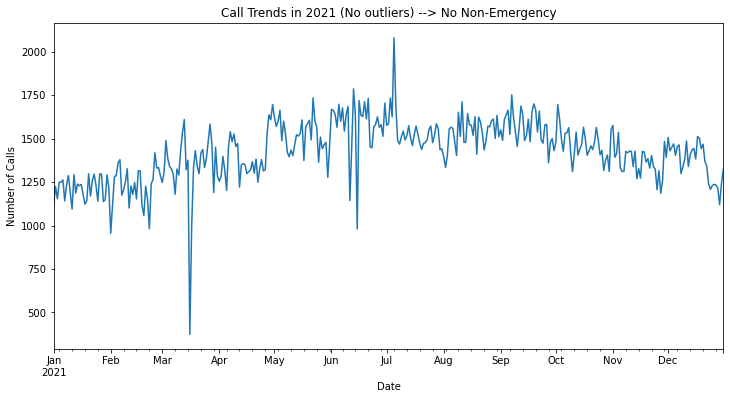

In [7]:
# create the ssame graph but disclude Non-Emergency calls
df_specific_year = df_specific_year[df_specific_year["priority"] != "Non-Emergency"]

# downsampling the data because of some outliers
time_series_plot = df_specific_year.resample('D', on='callDateTime').size().plot(figsize=(12, 6))
plt.title(f'Call Trends in {year} (No outliers) --> No Non-Emergency')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

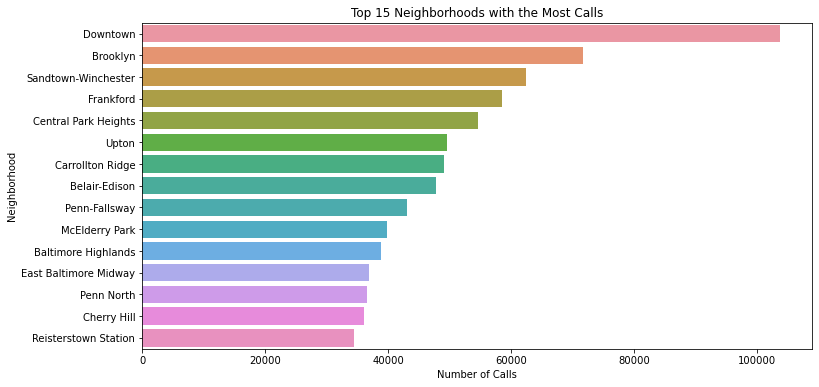

In [8]:
# Analysis of the Neighborhoods with the most 911 calls
num_neighbors = 15
top_neighborhoods = df['Neighborhood'].value_counts()[:num_neighbors].index

# Filter the DataFrame to include only the top neighborhoods
df_top_neighborhoods = df[df['Neighborhood'].isin(top_neighborhoods)]

# Create a horizontal bar plot for the top neighborhoods
plt.figure(figsize=(12, 6))
sns.countplot(y='Neighborhood', data=df_top_neighborhoods, order=top_neighborhoods)
plt.title(f'Top {num_neighbors} Neighborhoods with the Most Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Neighborhood')
plt.show()

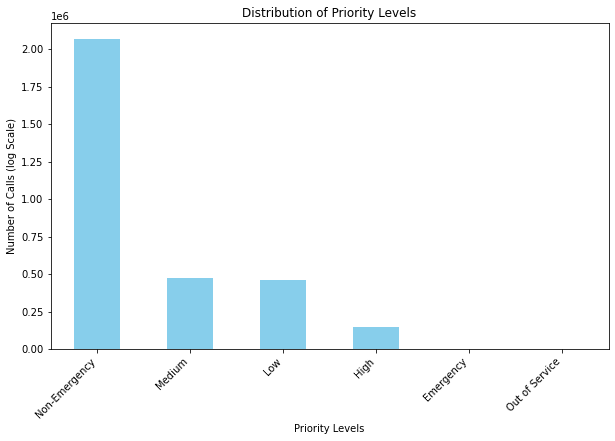

In [9]:
# graph of the priority levels on a log scale

priority_counts = df["priority"].value_counts()
plt.figure(figsize=(10, 6))
priority_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Priority Levels')
plt.xlabel('Priority Levels')
plt.ylabel('Number of Calls (log Scale)')
plt.xticks(rotation=45, ha='right')
plt.show()

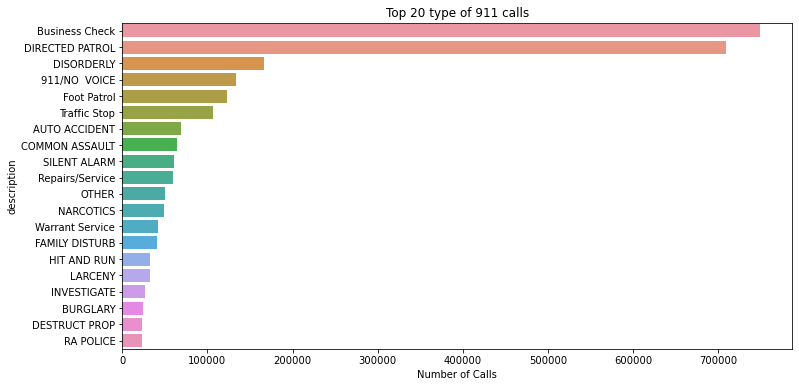

In [10]:
# Analysis of the type of 911 calls
num_descriptions = 20
top_reasons = df['description'].value_counts()[:num_descriptions].index

# Filter the DataFrame to include only the top descriptions
df_top_reason = df[df['description'].isin(top_reasons)]

# Create a horizontal bar plot for the top descriptions
plt.figure(figsize=(12, 6))
sns.countplot(y='description', data=df_top_reason, order=top_reasons)
plt.title(f'Top {num_descriptions} type of 911 calls')
plt.xlabel('Number of Calls')
plt.ylabel('description')
plt.show()

In [11]:
# find out the 5 highest reasons for 911 calls in each priority category
grouped_df = df.groupby('priority')['description'].value_counts()
result_df = pd.DataFrame(grouped_df.groupby('priority').nlargest(5))
result_df = result_df.rename(columns={"description": "num calls"}).droplevel(1)
result_df

num calls
priority       description                
Emergency      Immediate Inc           300
               ASSIST OFFICER          174
               ASSIST FIRE DEPT        128
               Traffic Pursuit           3
               HIT AND RUN               1
High           COMMON ASSAULT        30550
               AUTO ACC/INJURY       20509
               AGGRAV ASSAULT        14233
               ARMED PERSON          12687
               OVERDOSE              11074
Low            911/NO  VOICE        133262
               AUTO ACCIDENT         65134
               OTHER                 49887
               LARCENY               24350
               INVESTIGATE           23510
Medium         DISORDERLY           162449
               SILENT ALARM          60580
               NARCOTICS             49031
               FAMILY DISTURB        40960
               COMMON ASSAULT        33932
Non-Emergency  Business Check       749025
               DIRECTED PATROL      709435
               Foot Patrol          122721
               Traffic Stop         106904
               Repairs/Service       59991
Out of Service Private Tow             178
               Repo                     49
               SEE TEXT                 19
               POLICE INFO              15
               CLOSED CALL               6

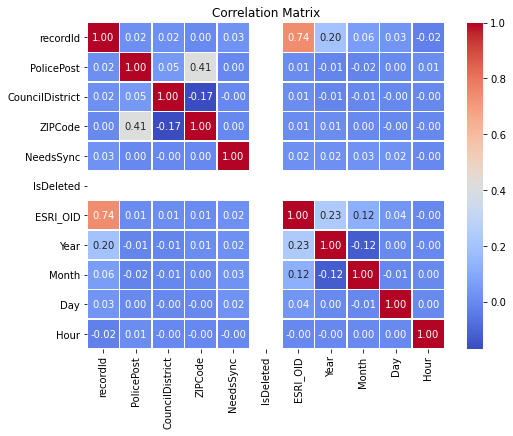

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
feature_names = ["priority", "district", "description"]
features = df[feature_names].columns.tolist()

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df[features].dropna())
df_encoded = pd.DataFrame(data_encoded, columns=features)
df_encoded

,priority,district,description
0,2.0,11.0,1786.0
1,3.0,12.0,2401.0
2,2.0,0.0,2592.0
3,3.0,7.0,2401.0
4,2.0,11.0,1103.0
...,...,...,...
3161005,4.0,11.0,1487.0
3161006,2.0,0.0,1786.0
3161007,3.0,10.0,550.0
3161008,2.0,11.0,2169.0


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(features))]
vif["Features"] = features
vif

,VIF,Features
0,4.797360,priority
1,3.533408,district
2,2.738879,description
